# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


# Preprocessing Data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separating labels from train data
labels = train['label']
train = train.drop(['label'],axis=1)

In [5]:
# Reshaping dataframe to form images
values = train.values
images = [i.reshape(28,28,1) for i in values]
images = np.array(images)

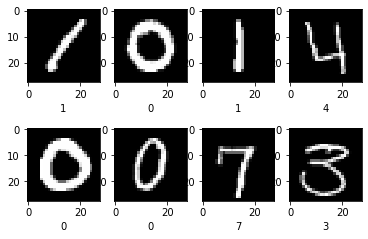

In [6]:
# plotting a few images
fig = plt.figure()
for i in range(8):
    a = fig.add_subplot(2,4,i+1)
    img = images[i].reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.xlabel(labels[i])

In [7]:
# one hot encoding
labels = to_categorical(labels)

In [8]:
#Performing a train-test split
#90% train data
#10% test data (used for validation)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

In [9]:
# applying data autgmentation
data_gen = ImageDataGenerator(rescale=1./255, 
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rotation_range=10,
                              zoom_range=0.15,)
data_gen.fit(X_train)

# CNN Model

In [10]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28, 28 ,1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28, 28 ,1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

W1012 22:20:55.986537 11520 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1012 22:20:56.004490 11520 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1012 22:20:56.007483 11520 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1012 22:20:56.049369 11520 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1012 22:20:56.100233 11520

In [11]:
his = model.fit(X_train,y_train,batch_size=128,epochs=20,validation_data=(X_test,y_test),verbose=1)

W1012 22:20:56.289726 11520 deprecation.py:323] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 7s 196us/step - loss: 0.3767 - acc: 0.9050 - val_loss: 0.0757 - val_acc: 0.9760
Epoch 2/20
37800/37800 [==============================] - 3s 90us/step - loss: 0.0771 - acc: 0.9768 - val_loss: 0.0486 - val_acc: 0.9855
Epoch 3/20
37800/37800 [==============================] - 3s 90us/step - loss: 0.0554 - acc: 0.9840 - val_loss: 0.0396 - val_acc: 0.9871
Epoch 4/20
37800/37800 [==============================] - 3s 90us/step - loss: 0.0426 - acc: 0.9873 - val_loss: 0.0412 - val_acc: 0.9871
Epoch 5/20
37800/37800 [==============================] - 3s 90us/step - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0393 - val_acc: 0.9890
Epoch 6/20
37800/37800 [==============================] - 3s 90us/step - loss: 0.0308 - acc: 0.9902 - val_loss: 0.0313 - val_acc: 0.9910
Epoch 7/20
37800/37800 [==============================] - 3s 90us/step - loss: 0.0244 - acc: 0.9921 - val_loss: 0.0400 - val_acc

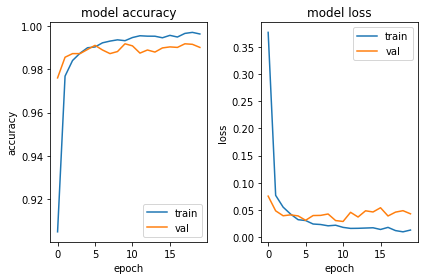

In [12]:
fig = plt.figure()
acc = fig.add_subplot(1,2,1)
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
loss = fig.add_subplot(1,2,2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

# Generating Results

In [13]:
predictions = model.predict_classes(X_test)

In [14]:
y_test = [np.argmax(y_test[i]) for i in range(len(predictions))]

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       408
           1       1.00      0.99      0.99       471
           2       0.99      0.99      0.99       420
           3       0.99      1.00      0.99       506
           4       0.99      0.99      0.99       397
           5       1.00      0.98      0.99       339
           6       0.99      0.99      0.99       402
           7       0.99      0.99      0.99       438
           8       0.98      1.00      0.99       403
           9       0.99      0.98      0.99       416

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [16]:
# saving model
model.save("MNIST_Digits.h5")